In [1]:
import pandas as pd 
import prince
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [31]:
df = pd.read_csv('cleaned_data.csv', index_col=0)

In [32]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n cycle,education__basic,education__graduation,education__master,education__phd
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [33]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'current_date', 'days_customer',
       'age', 'generation', 'edu_level', 'kid__0', 'kid__1', 'kid__2',
       'teen__0', 'teen__1', 'teen__2', 'complain__0', 'complain__1',
       'generation__silent', 'generation__boomer', 'generation__x',
       'generation__millennial', 'marital_status__divorced',
       'marital_status__married', 'marital_status__single',
       'marital_status__together', 'marital_status__widow',
       'education__2n cycle', 'education__basic', 'education__graduation',
       'education__master', 'educat

In [36]:
data = df[['year_birth', 'income', 'recency', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 
            'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 
            'numstorepurchases', 'numwebvisitsmonth', 'days_customer', 'age']]

In [34]:
features = ['year_birth', 'income', 'recency', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 
            'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 
            'numstorepurchases', 'numwebvisitsmonth', 'days_customer', 'age']

In [6]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['mntwines']].values

In [7]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5', 'principal component 6',
                                                                 'principal component 7', 'principal component 8',
                                                                 'principal component 9', 'principal component 10',
                                                                 'principal component 11', 'principal component 12',
                                                                 'principal component 13', 'principal component 14',
                                                                 'principal component 15'])
                                                                 

In [9]:
#eigenvalue ratio - adds up to one
pca.explained_variance_ratio_

array([3.44180972e-01, 1.35843359e-01, 1.13314237e-01, 6.72264286e-02,
       5.86565136e-02, 4.99936550e-02, 4.21728803e-02, 4.06313064e-02,
       3.20804354e-02, 2.84757925e-02, 2.70494364e-02, 2.55692989e-02,
       1.80580368e-02, 1.67476488e-02, 6.33949899e-34])

In [10]:
#eigenvalue
pca.explained_variance_

array([5.16502039e+00, 2.03856045e+00, 1.70047270e+00, 1.00884681e+00,
       8.80240668e-01, 7.50239754e-01, 6.32875738e-01, 6.09741803e-01,
       4.81421451e-01, 4.27327659e-01, 4.05922761e-01, 3.83710783e-01,
       2.70991530e-01, 2.51326932e-01, 9.51349558e-33])

In [11]:
# relative position of observations in the principle component axis 
principalDf.iloc[:,:].head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15
0,3.724898,0.852042,1.551873,-0.682365,-1.965495,0.384979,-0.334698,1.130724,1.790533,-0.746174,-0.796119,0.263664,-0.097039,-0.680883,-5.190227e-16
1,-1.780007,1.644674,-1.827341,0.399630,-0.011600,-0.025893,-0.046895,0.600153,0.241756,0.080200,0.278853,0.140436,-0.016980,-0.067344,1.854583e-17
2,1.655225,0.363481,-0.155857,1.028321,0.101214,-0.691760,-0.381351,-1.260898,-0.546952,-0.583411,-0.626548,0.896584,-0.369279,0.012363,-4.445960e-17
3,-2.295545,-1.665776,-0.569648,0.880755,0.427805,-0.356245,-0.278482,0.195812,-0.136091,-0.001013,-0.322027,-0.138278,0.011624,0.102626,-2.060635e-16
4,-0.031301,-1.086333,0.475777,-1.201425,1.774374,-0.242236,-1.092601,0.642652,0.009482,-0.301572,0.193233,0.307910,-0.353419,-0.215956,-3.571811e-17


In [12]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[5.16502039e+00 2.03856045e+00 1.70047270e+00 1.00884681e+00
 8.80240668e-01 7.50239754e-01 6.32875738e-01 6.09741803e-01
 4.81421451e-01 4.27327659e-01 4.05922761e-01 3.83710783e-01
 2.70991530e-01 2.51326932e-01 9.51349558e-33]
[[-8.06200456e-02  3.27933414e-01  8.28478136e-03  3.21200814e-01
   3.51474220e-01  3.32052517e-01  3.20222494e-01  2.58927228e-01
  -4.65199224e-02  2.33917388e-01  3.56008280e-01  3.20426133e-01
  -2.91546733e-01  3.93368475e-02  8.06200456e-02]
 [-6.67472327e-01  3.98468279e-02  1.88171842e-02 -1.18512652e-01
  -1.02002998e-01 -1.03287008e-01 -1.10213858e-01  2.13670565e-03
   1.86524011e-01  1.37831841e-01 -4.99885826e-03  4.87986945e-02
   5.54718871e-02  2.18528600e-02  6.67472327e-01]
 [ 1.47819541e-01 -8.66734230e-02 -4.54330313e-03 -8.49252211e-03
  -5.11506489e-02 -1.69487371e-02  1.16566232e-02  2.27462769e-01
   5.27003092e-01  3.94406062e-01  2.00687005e-02  1.34869532e-01
   4.19774772e-01  5.15580333e-01 -1.47819541e-01]
 [ 1.44572853e-02  6.59

In [13]:
# examine the first pricipal component
eig_vectors[0]

array([-0.08062005,  0.32793341,  0.00828478,  0.32120081,  0.35147422,
        0.33205252,  0.32022249,  0.25892723, -0.04651992,  0.23391739,
        0.35600828,  0.32042613, -0.29154673,  0.03933685,  0.08062005])

In [14]:
# examine the components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# the .components attribute shows principal axes in feature space, representing the directions of maximum variance in the data. 
#The components are sorted by explained_variance_ (eigenvalues)


In [15]:
print(pc1)
print(pc2)

[-0.08062005  0.32793341  0.00828478  0.32120081  0.35147422  0.33205252
  0.32022249  0.25892723 -0.04651992  0.23391739  0.35600828  0.32042613
 -0.29154673  0.03933685  0.08062005]
[-0.66747233  0.03984683  0.01881718 -0.11851265 -0.102003   -0.10328701
 -0.11021386  0.00213671  0.18652401  0.13783184 -0.00499886  0.04879869
  0.05547189  0.02185286  0.66747233]


In [16]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

year_birth            -0.183223
income                 0.745284
recency                0.018829
mntfruits              0.729983
mntmeatproducts        0.798784
mntfishproducts        0.754645
mntsweetproducts       0.727759
mntgoldprods           0.588456
numdealspurchases     -0.105724
numwebpurchases        0.531617
numcatalogpurchases    0.809089
numstorepurchases      0.728222
numwebvisitsmonth     -0.662589
days_customer          0.089400
age                    0.183223
dtype: float64

In [17]:
str_loading_1.sort_values(ascending=False)

numcatalogpurchases    0.809089
mntmeatproducts        0.798784
mntfishproducts        0.754645
income                 0.745284
mntfruits              0.729983
numstorepurchases      0.728222
mntsweetproducts       0.727759
mntgoldprods           0.588456
numwebpurchases        0.531617
age                    0.183223
days_customer          0.089400
recency                0.018829
numdealspurchases     -0.105724
year_birth            -0.183223
numwebvisitsmonth     -0.662589
dtype: float64

In [18]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features)
str_loading_2

year_birth            -0.953005
income                 0.056893
recency                0.026867
mntfruits             -0.169210
mntmeatproducts       -0.145638
mntfishproducts       -0.147471
mntsweetproducts      -0.157361
mntgoldprods           0.003051
numdealspurchases      0.266316
numwebpurchases        0.196794
numcatalogpurchases   -0.007137
numstorepurchases      0.069674
numwebvisitsmonth      0.079202
days_customer          0.031201
age                    0.953005
dtype: float64

In [19]:
str_loading_2.sort_values(ascending=False)

age                    0.953005
numdealspurchases      0.266316
numwebpurchases        0.196794
numwebvisitsmonth      0.079202
numstorepurchases      0.069674
income                 0.056893
days_customer          0.031201
recency                0.026867
mntgoldprods           0.003051
numcatalogpurchases   -0.007137
mntmeatproducts       -0.145638
mntfishproducts       -0.147471
mntsweetproducts      -0.157361
mntfruits             -0.169210
year_birth            -0.953005
dtype: float64

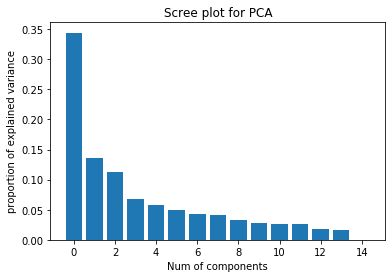

In [20]:
index = np.arange(15)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance');

Text(0, 0.5, 'explained variance ratio')

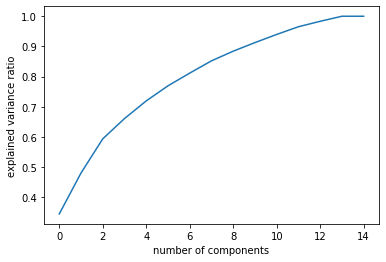

In [21]:
# plotting screeplots 
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [22]:
# you can also use numpy to solve for this aa
import numpy as np 
corr_mat = pd.DataFrame(x).corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_mat)

In [23]:
eigenvalues

array([ 5.16271458e+00,  2.03765038e+00,  1.69971356e+00, -3.57640580e-17,
        1.00839643e+00,  8.79847703e-01,  7.49904826e-01,  6.32593204e-01,
        6.09469596e-01,  2.51214733e-01,  2.70870552e-01,  4.81206531e-01,
        3.83539483e-01,  4.27136888e-01,  4.05741545e-01])

In [24]:
eigenvectors

array([[-8.06200456e-02,  6.67472327e-01,  1.47819541e-01,
         7.07106781e-01,  1.44572853e-02, -1.49559817e-01,
         8.83416574e-03,  2.50979848e-02,  2.97900806e-02,
         2.21526598e-02, -2.92317976e-02,  1.07778092e-02,
         2.11580725e-02,  5.83485535e-03, -3.84999244e-03],
       [ 3.27933414e-01, -3.98468279e-02, -8.66734230e-02,
        -4.42862999e-16,  6.59766349e-02, -2.99091914e-01,
         2.56603816e-01,  1.07090073e-01,  2.40590248e-01,
         6.27520991e-02,  1.99711454e-01, -1.19888133e-01,
         5.53722617e-01, -1.46578213e-03, -5.38095461e-01],
       [ 8.28478136e-03, -1.88171842e-02, -4.54330313e-03,
        -2.03565533e-16, -9.75503569e-01, -1.89598038e-01,
        -7.81626542e-02, -4.31608188e-02,  3.54532770e-02,
         3.40140488e-03,  5.86298174e-03,  4.41715663e-03,
         3.03385352e-02, -4.20691271e-02, -4.13754230e-03],
       [ 3.21200814e-01,  1.18512652e-01, -8.49252211e-03,
         4.19126546e-17, -2.76019765e-03,  2.58280785

## K-Means

In [37]:
data.head()

,year_birth,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,days_customer,age
0,1957,58138,58,88,546,172,88,88,3,8,10,4,7,664,59
1,1954,46344,38,1,6,2,1,6,2,1,1,2,5,114,62
2,1965,71613,26,49,127,111,21,42,1,8,2,10,4,313,51
3,1984,26646,26,4,20,10,3,5,2,2,0,4,6,140,32
4,1981,58293,94,43,118,46,27,15,5,5,3,6,5,162,35


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
# Set num of clusters at initialization time
k_means = KMeans(n_clusters=3)
# Run the clustering algorithm
k_means.fit(data)
# Generate cluster index values for each row
cluster_assignments = k_means.predict(data)
# Cluster predictions for each point are also stored in k_means.labels_
# Note that we could also pass in k_means.labels_ instead of cluster_assignments
print(calinski_harabasz_score(data, cluster_assignments))

3699.1121762006383


In [69]:
import seaborn as sns

In [40]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
k_means = KMeans(n_clusters=4)
k_means.fit(x)
predicted_clusters = k_means.predict(x)

In [122]:
predicted_clusters

array([1, 2, 1, ..., 0, 1, 2], dtype=int32)

(array([722.,   0.,   0., 598.,   0.,   0., 435.,   0.,   0., 485.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

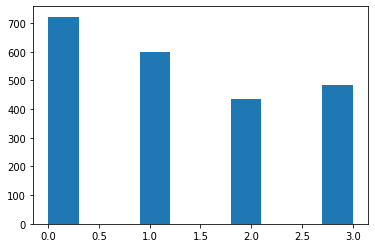

In [123]:
plt.hist(predicted_clusters)

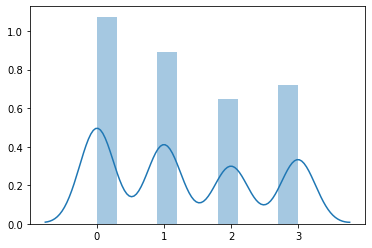

In [124]:
sns.distplot(predicted_clusters)

In [125]:
data['predicted_cluster'] = predicted_clusters

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
data.head()

,year_birth,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,days_customer,age,predicted_cluster
0,1957,58138,58,88,546,172,88,88,3,8,10,4,7,664,59,1
1,1954,46344,38,1,6,2,1,6,2,1,1,2,5,114,62,2
2,1965,71613,26,49,127,111,21,42,1,8,2,10,4,313,51,1
3,1984,26646,26,4,20,10,3,5,2,2,0,4,6,140,32,0
4,1981,58293,94,43,118,46,27,15,5,5,3,6,5,162,35,3


In [127]:
data[data['predicted_cluster'] == 2]

,year_birth,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,days_customer,age,predicted_cluster
1,1954,46344,38,1,6,2,1,6,2,1,1,2,5,114,62,2
9,1950,5648,68,0,6,1,1,13,1,1,0,0,20,109,66,2
13,1952,59354,53,2,53,3,5,14,3,6,1,5,6,227,64,2
17,1946,37760,20,5,38,150,12,28,2,4,1,6,7,668,70,2
22,1949,58607,63,0,86,0,0,19,3,2,3,9,8,554,67,2
23,1954,65324,0,0,102,21,32,5,3,6,2,9,4,170,62,2
31,1963,38620,56,17,44,34,22,89,1,2,5,3,3,415,53,2
35,1951,49389,55,0,19,2,1,3,1,2,0,3,7,305,65,2
42,1957,21994,4,0,6,3,1,3,1,0,0,3,5,553,59,2
43,1959,51381,80,11,50,3,2,39,1,1,3,4,2,237,57,2


In [128]:
data[data['predicted_cluster'] == 4]

,year_birth,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,days_customer,age,predicted_cluster


In [129]:
data['predicted_cluster'].value_counts()

0    722
1    598
3    485
2    435
Name: predicted_cluster, dtype: int64

<BarContainer object of 2240 artists>

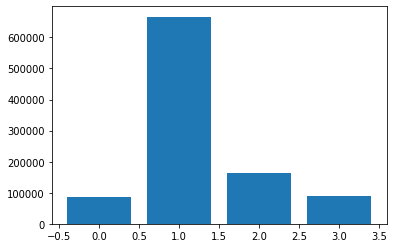

In [132]:
plt.bar(data['predicted_cluster'], data['income'])

<BarContainer object of 2240 artists>

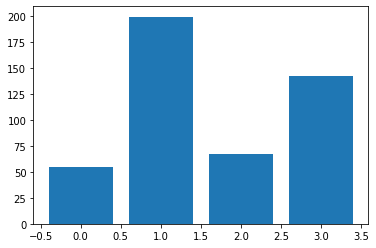

In [131]:
plt.bar(data['predicted_cluster'], data['mntfruits'])

In [116]:
k_means_3 = KMeans(n_clusters=3).fit(data)
k_means_4 = KMeans(n_clusters=4).fit(data)
k_means_5 = KMeans(n_clusters=5).fit(data)
k_means_6 = KMeans(n_clusters=6).fit(data)
k_means_7 = KMeans(n_clusters=7).fit(data)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [117]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(data, labels))

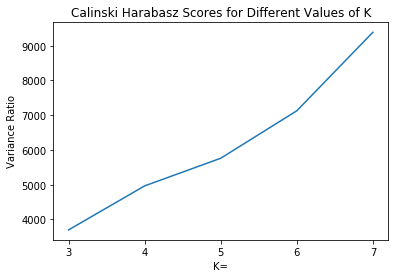

In [118]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [119]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

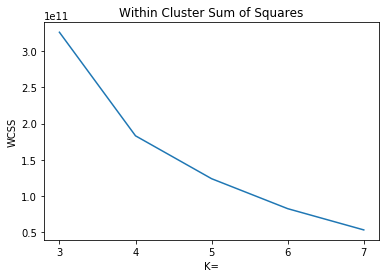

In [120]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

### Code from KMM

In [ ]:
### Implement Clustering

### Import Data
```python
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

og_df = df.read_csv('example.csv')
```

### Create X and y
```python
features = ['feature_1', 'feature_2', . . . ]
X = og_df[features].values
y = og_df['target'].values
```

### Elbow Plot for Calinski Harabasz Scores
```python
k_means_3 = KMeans(n_clusters=3).fit(X)
k_means_4 = KMeans(n_clusters=4).fit(X)
k_means_5 = KMeans(n_clusters=5).fit(X)
k_means_6 = KMeans(n_clusters=6).fit(X)
k_means_7 = KMeans(n_clusters=7).fit(X)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]
```

```python
CH_score = []
for x in k_list:
    labels = x.labels_
    CH_score.append(calinski_harabasz_score(X_2, labels))
```

```python
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylab